In [1]:
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames


import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
# from utils.helper import fn_plot_confusion_matrix


In [2]:
def fn_plot_tf_hist(hist_df):
    
    '''
    Args:
        hist_df: a dataframe with following ccolumns
            column 0: accuracy
            column 1: loss
            column 2: val_accuracy
            column 3: val_loss
            While plotting columns are accessed by index 
            so that even if the column names are different it will not throw exceptions.
    '''
        
    fig, axes = plt.subplots(1,2 , figsize = (15,6))

    # properties  matplotlib.patch.Patch 
    props = dict(boxstyle='round', facecolor='aqua', alpha=0.4)
    facecolor = 'cyan'
    fontsize=12
    CMAP = plt.cm.coolwarm
    
    # Get columns by index to eliminate any column naming error
    y1 = hist_df.columns[0]
    y2 = hist_df.columns[1]
    y3 = hist_df.columns[2]
    y4 = hist_df.columns[3]

    # Where was min loss
    best = hist_df[hist_df[y4] == hist_df[y4].min()]
    
    ax = axes[0]

    hist_df.plot(y = [y2,y4], ax = ax, colormap=CMAP)


    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n   test: {:6.4f}'
    txtstr = txtFmt.format(y2.capitalize(), 
                           hist_df.iloc[-1][y2],
                           hist_df.iloc[-1][y4]) #text to plot
    
    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.95, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)
    
    # calculate offset for arroe
    y_min = min(hist_df[y2].min(), hist_df[y4].min())
    y_max = max(hist_df[y2].max(), hist_df[y4].max())
    offset = (y_max-y_min)/10.0
    
    # Mark arrow at lowest
    ax.annotate(f'Min: {best[y4].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y4].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y4].to_numpy()[0] + offset ), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow

    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel('Epochs')
    ax.set_ylabel(y2.capitalize())
    ax.set_title('Errors')
    ax.grid(True)
    ax.legend(loc = 'upper left') # model legend to upper left

    ax = axes[1]

    hist_df.plot( y = [y1, y3], ax = ax, colormap=CMAP)
    
    # little beautification
    txtFmt = '{:s}: \n  train: {:6.4f}\n  test:  {:6.4f}'
    txtstr = txtFmt.format(y1.capitalize(),
                           hist_df.iloc[-1][y1],
                           hist_df.iloc[-1][y3]) #text to plot

    # place a text box in upper middle in axes coords
    ax.text(0.3, 0.2, txtstr, transform=ax.transAxes, fontsize=fontsize,
            verticalalignment='top', bbox=props)

    # calculate offset for arroe
    y_min = min(hist_df[y1].min(), hist_df[y3].min())
    y_max = max(hist_df[y1].max(), hist_df[y3].max())
    offset = (y_max-y_min)/10.0

    # Mark arrow at lowest
    ax.annotate(f'Best: {best[y3].to_numpy()[0]:6.4f}', # text to print
                xy=(best.index.to_numpy(), best[y3].to_numpy()[0]), # Arrow start
                xytext=(best.index.to_numpy(), best[y3].to_numpy()[0]-offset), # location of text 
                fontsize=fontsize, va='bottom', ha='right',bbox=props, # beautification of text
                arrowprops=dict(facecolor=facecolor, shrink=0.05)) # arrow
    
    
    # Draw vertical line at best value
    ax.axvline(x = best.index.to_numpy(), color = 'green', linestyle='-.', lw = 3)

    ax.set_xlabel("Epochs")
    ax.set_ylabel(y1.capitalize())
    ax.grid(True)
    ax.legend(loc = 'lower left')
    
    plt.tight_layout()
    

In [3]:
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth 
        y_pred : Predictions
        labels : labels in a dictonary 
                  {0: 'Goal Keeper', 
                  1: 'Defender', 
                  2: 'Mid-Fielder', 
                  3: 'Forward'}
    
    '''
    
    cm  = confusion_matrix(y_true, y_pred)
    
    if isinstance(labels, dict):
        display_labels = labels.values()
    else:
        display_labels = labels

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)
    
    fig, ax = plt.subplots(figsize = (4,4))
    
    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)
    
    # Disable the grid
    ax.grid(False)

    plt.show()

In [4]:
RANDOM_STATE=24
np.random.seed(RANDOM_STATE)
rng=np.random.default_rng(seed=RANDOM_STATE)

TEST_SIZE=0.2
EPOCHS=200
ALPHA=0.001
BATCH_SIZE=16
params={"legend.fontsi"}

WEIGHT_DECAY = 0.001
PATIENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE=5
MIN_LR = 1e-6

## **Weather History**

In [5]:
data_df = pd.read_csv(r"D:\Datasets\DL\dnn_input\weatherHistory.csv")
data_df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [6]:
for col in data_df.columns:
    print(f"Col :{col} . {data_df[col].unique()}")

Col :Formatted Date . ['2006-04-01 00:00:00.000 +0200' '2006-04-01 01:00:00.000 +0200'
 '2006-04-01 02:00:00.000 +0200' ... '2016-09-09 21:00:00.000 +0200'
 '2016-09-09 22:00:00.000 +0200' '2016-09-09 23:00:00.000 +0200']
Col :Summary . ['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy'
 'Breezy and Mostly Cloudy' 'Clear' 'Breezy and Partly Cloudy'
 'Breezy and Overcast' 'Humid and Mostly Cloudy' 'Humid and Partly Cloudy'
 'Windy and Foggy' 'Windy and Overcast' 'Breezy and Foggy'
 'Windy and Partly Cloudy' 'Breezy' 'Dry and Partly Cloudy'
 'Windy and Mostly Cloudy' 'Dangerously Windy and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Light Rain' 'Drizzle' 'Windy and Dry'
 'Dry and Mostly Cloudy' 'Breezy and Dry' 'Rain']
Col :Precip Type . ['rain' 'snow' nan]
Col :Temperature (C) . [ 9.47222222  9.35555556  9.37777778 ... 28.47222222 28.33888889
 30.60555556]
Col :Apparent Temperature (C) . [ 7.38888889  7.22777778  9.37777778 ... 12.14444444  9.73888889
  9.23333333]
Col :Humidit

In [7]:
data_df["datetime"] = pd.to_datetime(data_df["Formatted Date"],utc=True)

In [8]:
data_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'datetime'],
      dtype='object')

NameError: name 'num_cols' is not defined

<Figure size 20000x6000 with 0 Axes>

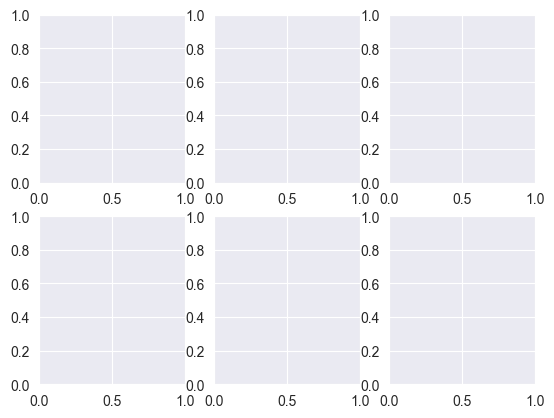

In [9]:
plt.figure(figsize=(200,60))
fig,axes = plt.subplots(2,3)

axes = axes.ravel()
for count, col in enumerate(num_cols):
    ax=axes[count]
    sns.violinplot(data=data_df,y=col,ax = ax)
plt.tight_layout()

In [120]:
tmp_df = data_df[["datetime", "Temperature (C)", 'Humidity', 'Visibility (km)' ]]
tmp_df = tmp_df.sort_values("datetime",axis=0,ascending=True)
tmp_df = tmp_df.reset_index(drop=True)
tmp_df.head()

,datetime,Temperature (C),Humidity,Visibility (km)
0,2005-12-31 23:00:00+00:00,0.577778,0.89,9.9820
1,2006-01-01 00:00:00+00:00,1.161111,0.85,9.9015
2,2006-01-01 01:00:00+00:00,1.666667,0.82,9.9015
3,2006-01-01 02:00:00+00:00,1.711111,0.82,9.9015
4,2006-01-01 03:00:00+00:00,1.183333,0.86,9.9015


In [121]:
tmp_df.columns

Index(['datetime', 'Temperature (C)', 'Humidity', 'Visibility (km)'], dtype='object')

In [122]:
tmp_df =tmp_df.rename({"Temperature (C)" : "temp","Humidity":"hum","Visibility (km)":"viz"},axis=1)
tmp_df.head()

,datetime,temp,hum,viz
0,2005-12-31 23:00:00+00:00,0.577778,0.89,9.9820
1,2006-01-01 00:00:00+00:00,1.161111,0.85,9.9015
2,2006-01-01 01:00:00+00:00,1.666667,0.82,9.9015
3,2006-01-01 02:00:00+00:00,1.711111,0.82,9.9015
4,2006-01-01 03:00:00+00:00,1.183333,0.86,9.9015


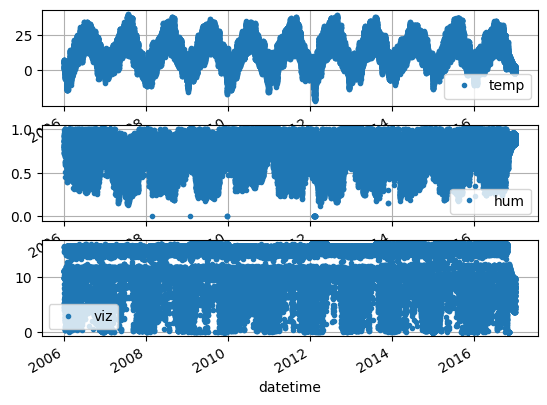

In [123]:

fig, axes=plt.subplots(3,1)
ax=axes[0]
tmp_df.plot(x="datetime",y="temp",style = ".",ax=ax)
ax.grid()

ax=axes[1]
tmp_df.plot(x="datetime",y="hum",style = ".",ax=ax)
ax.grid()

ax=axes[2]
tmp_df.plot(x="datetime",y="viz",style = ".",ax=ax)
ax.grid()

plt.show()

In [124]:
time_step =24
y_idx = np.arange(time_step,tmp_df.shape[0],time_step)
y_idx

array([   24,    48,    72, ..., 96384, 96408, 96432], shape=(4018,))

In [125]:
y_df = tmp_df.iloc[y_idx]
y_df.head()

,datetime,temp,hum,viz
24,2006-01-01 23:00:00+00:00,5.422222,0.86,15.6492
48,2006-01-02 23:00:00+00:00,1.694444,0.92,4.4919
72,2006-01-03 23:00:00+00:00,2.200000,0.89,9.5795
96,2006-01-04 23:00:00+00:00,1.666667,0.92,9.9015
120,2006-01-05 23:00:00+00:00,1.805556,0.99,2.2057


In [126]:
X_df = tmp_df.iloc[range(len(y_df) * time_step)]
X_df.shape

(96432, 4)

In [127]:
X_temp=np.reshape(X_df["temp"].to_numpy(),(len(y_df),time_step))
X_hum=np.reshape(X_df["hum"].to_numpy(),(len(y_df),time_step))
X_viz=np.reshape(X_df["viz"].to_numpy(),(len(y_df),time_step))
X_temp.shape

(4018, 24)

In [128]:
X_temp=X_temp[:,:23]
X_hum=X_hum[:,:23]
X_viz=X_viz[:,:23]
# X_temp=np.reshape(X_temp,(X_temp.shape[0],X_temp.shape[1],1))
X_temp.shape

(4018, 23)

In [129]:
X_data =np.stack((X_temp,X_hum,X_viz),axis=2)

In [130]:
split = int(y_df.shape[0]*(1-TEST_SIZE))
X_train = X_data[:split]
X_test = X_data[split:]
y_train = y_df["temp"].to_numpy()[:split]
y_test = y_df["temp"].to_numpy()[split:]
y_train.shape,y_test.shape


((3214,), (804,))

In [131]:
# start = -2.1
# end = 2.1

# delta = 0.001

# # Training Data
# X_train = np.arange(start,end+delta,delta)
# y_true = 2*np.square(X_train) + 2*np.sin(np.pi*X_train)
# y_rng = np.random.rand(X_train.shape[0]) -0.5
# y_train = y_true + y_rng*2

# y_train.min(),y_true.max()

# # Testing Data
# X_test = np.arange(start,end+delta,delta*10)
# y_true_test = 2*np.square(X_test) + 2*np.sin(np.pi*X_test)
# y_rng = np.random.rand(X_test.shape[0]) -0.5
# y_test = y_true_test + y_rng*2
# y_test.min(),y_test.max()

In [132]:
y_train.shape,X_test.shape

((3214,), (804, 23, 3))

In [133]:
# num_examples=262* BATCH_SIZE

# X_train=X_train[:num_examples]
# y_train=y_train[:num_examples]
# y_true=y_true[:num_examples]

# X_train.shape,y_train.shape,y_true.shape


In [134]:
# fig,axes=plt.subplots(1,2)
# ax=axes[0]
# ax.plot(X_train,y_train,"b*", label="Train")
# ax.plot(X_train,y_true,c="k",linewidth=2,label=True)
# ax.legend()

# ax=axes[1]
# ax.plot(X_test,y_test,"g*", label="Test")
# ax.plot(X_test,y_true_test,c="k",linewidth=2,label=True)
# ax.legend()

## **Define model**

In [141]:
h_units =512
input_shape = (time_step-1,X_train.shape[2])

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = input_shape))
model.add(tf.keras.layers.SimpleRNN(units =h_units,activation="tanh"))
model.add(tf.keras.layers.Dense(1,activation="linear"))

## **Define Model**

#### Functional API

In [142]:
optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA)
loss_fn = tf.keras.losses.MeanSquaredError()
metrics=tf.keras.metrics.RootMeanSquaredError()

model.compile(optimizer = optimizer, loss= loss_fn, metrics =[metrics])

### Callbacks

In [143]:
PATIENCE = 20
LR_FACTOR = 0.1
LR_PATIENCE = 5
MIN_LR = 1e-6

es_call_back =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=PATIENCE,
    verbose=1,
    restore_best_weights=True
)

lr_callback=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=LR_FACTOR,
    patience=LR_PATIENCE,
    verbose=1,
    mode="auto",
    min_lr=MIN_LR,
)


In [144]:
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((804, 23, 3), (804,), (3214, 23, 3), (3214,))

In [145]:
history=model.fit(X_train,y_train,validation_data=[X_test,y_test],callbacks=[es_call_back,lr_callback],batch_size= BATCH_SIZE,epochs= EPOCHS)
history

Epoch 1/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 3.5684 - root_mean_squared_error: 1.8890 - val_loss: 0.8989 - val_root_mean_squared_error: 0.9481 - learning_rate: 0.0010
Epoch 2/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.3450 - root_mean_squared_error: 1.1597 - val_loss: 0.8029 - val_root_mean_squared_error: 0.8960 - learning_rate: 0.0010
Epoch 3/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.3246 - root_mean_squared_error: 1.1509 - val_loss: 0.9788 - val_root_mean_squared_error: 0.9893 - learning_rate: 0.0010
Epoch 4/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.2434 - root_mean_squared_error: 1.1151 - val_loss: 0.8111 - val_root_mean_squared_error: 0.9006 - learning_rate: 0.0010
Epoch 5/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 1.1811 - root_mean_squared_error: 1.0868 - val_loss: 0.7784 - val_root_mean_squared_error: 0.8823 - learning_rate: 0.0010
Epoch 6/200
201/201 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 1.3032 - root_mean

## **Prediction**

,loss,root_mean_squared_error,val_loss,val_root_mean_squared_error,learning_rate
0,3.568435,1.889030,0.898855,0.948080,1.000000e-03
1,1.344991,1.159737,0.802877,0.896034,1.000000e-03
2,1.324626,1.150924,0.978769,0.989328,1.000000e-03
3,1.243363,1.115062,0.811120,0.900622,1.000000e-03
4,1.181112,1.086790,0.778447,0.882296,1.000000e-03
5,1.303171,1.141565,0.878029,0.937032,1.000000e-03
6,1.246827,1.116614,0.730993,0.854981,1.000000e-03
7,1.127665,1.061916,0.876151,0.936030,1.000000e-03
8,1.869720,1.367377,1.815152,1.347276,1.000000e-03
9,1.774834,1.332229,1.043181,1.021362,1.000000e-03


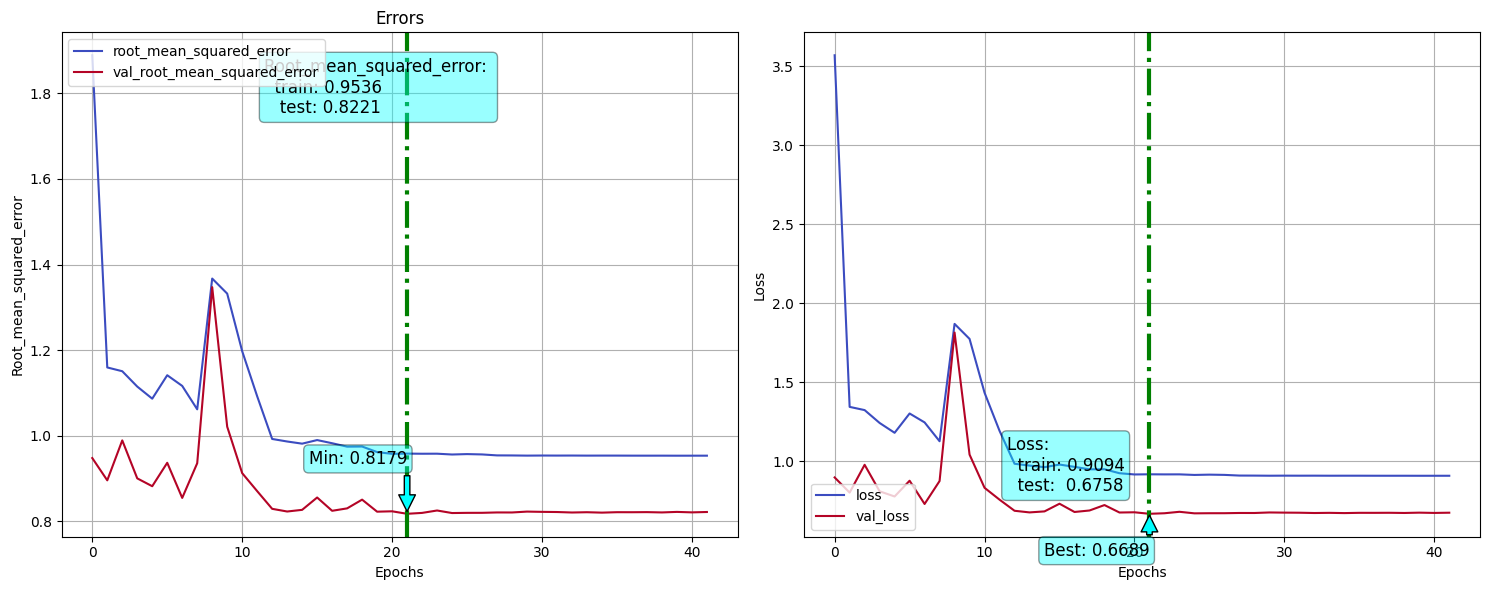

In [151]:
loss_df=pd.DataFrame(history.history)
fn_plot_tf_hist(loss_df.iloc[:,:])

In [ ]:
y_pred_train=model(X_train).numpy()
y_pred_test=model(X_test).numpy()

y_pred = np.append(y_pred_train,y_pred_test)
        
res_df=y_df.copy()
res_df["pred"] = y_pred
res_df["datetime"] = res_df["datetime"].dt.date
res_df.head()
# display(rw_df.head())

# test_df=pd.DataFrame({"pred":y_pred_test[:,0],
#                        "y_test":y_test,
#                        "y_true":y_true_test})
# test_df.head()

,datetime,temp,pred
24,2006-01-01,5.422222,5.016172
48,2006-01-02,1.694444,1.574927
72,2006-01-03,2.200000,1.911867
96,2006-01-04,1.666667,1.751253
120,2006-01-05,1.805556,2.278223


(4192,)

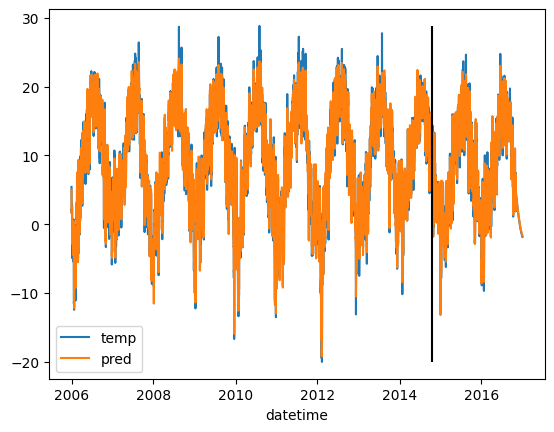

In [ ]:
ax=res_df.plot(x="datetime" ,y=["temp","pred"])
ax.vlines(res_df.iloc[X_train.shape[0]]["datetime"],res_df["temp"].min(),res_df["temp"].max(),color = "k")
# train_df.y_true.plot(c="w",ax=ax,label="True")

# plt.scatter(x=train_df.index,y=y_train,marker="*",c="Grey",alpha=0.8)

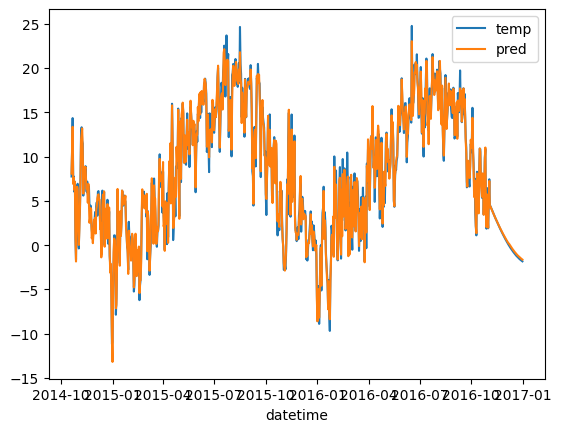

In [ ]:
res_df.iloc[X_train.shape[0]:].plot(x="datetime" ,y=["temp","pred"]);


## **Predictions**

In [ ]:
prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [ ]:
y_pred=prob_model(X_train).numpy()
print(f"Accuracy:{accuracy_score(y_train,y_pred.argmax(axis=1)):.4f}")
print(classification_report(y_train,y_pred.argmax(axis=1)))

Accuracy:0.8981
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1608
           1       0.93      0.94      0.93      4698
           2       0.86      0.87      0.87      5489
           3       0.86      0.82      0.84      2722

    accuracy                           0.90     14517
   macro avg       0.91      0.91      0.91     14517
weighted avg       0.90      0.90      0.90     14517



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (3).

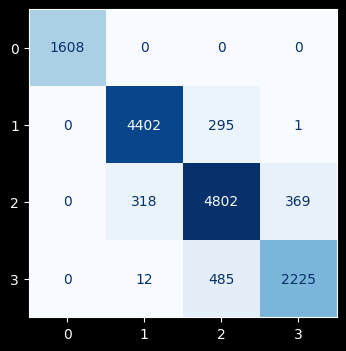

In [ ]:
fn_plot_confusion_matrix(y_train,y_pred.argmax(axis=1),class_names)

In [ ]:
y_pred=prob_model(X_test).numpy()
print(f"Accuracy:{accuracy_score(y_test,y_pred.argmax(axis=1)):.4f}")
print(classification_report(y_test,y_pred.argmax(axis=1)))

Accuracy:0.9167
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.92      0.86      0.89        14
           2       0.89      1.00      0.94         8

    accuracy                           0.92        36
   macro avg       0.91      0.93      0.92        36
weighted avg       0.92      0.92      0.92        36



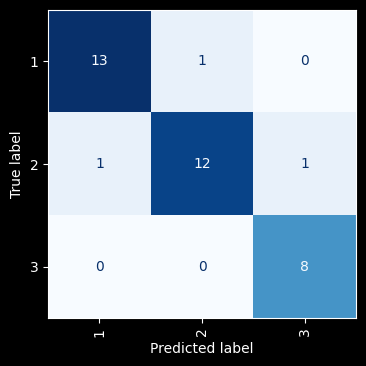

In [ ]:
fn_plot_confusion_matrix(y_test,y_pred.argmax(axis=1),class_names)

In [ ]:
loss_hist={}
# y_train=y_train.reshape(-1,1)
param={}
param["h_dim"]=[X_train.shape[1],5,5,4,3,y_train.shape[1]]##No. of neurons in hidden layer
y_train.shape

IndexError: tuple index out of range

In [ ]:
np.exp(710)

C:\Users\dai\AppData\Local\Temp\ipykernel_18148\574927170.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(710)


np.float64(inf)

In [ ]:
def fn_softmax(z):
    exp_score=np.exp(z-np.max(z))
    return exp_score/np.sum(exp_score,axis=1,keepdims=True)

In [ ]:
sm=fn_softmax(np.asarray([[-1,0,1.0],[-10,0,8]]))
sm.sum(axis=1)

array([1., 1.])

In [ ]:
def fn_activ(z):
    return np.tanh(z)
def fn_active_prime(z):
    return 1.0 - np.tanh(z)**2

In [ ]:
def predict(model,X):
    W1=model["W1"]
    W2=model["W2"]
    b1=model["b1"]
    b2=model["b2"]

    #Forward propogation
    z1=X.dot(W1) + b1 #Aggregation
    a1=fn_activ(z1) # Activation

    z2=a1.dot(W2) + b2 #Aggregation
    a2=fn_softmax(z2) # Activation

    return a2>=0.5

In [ ]:
def calculate_loss(model, X , y):
    W1=model["W1"]
    W2=model["W2"]
    b1=model["b1"]
    b2=model["b2"]

    #Forward propogation
    z1=X.dot(W1) + b1 #Aggregation
    a1=fn_activ(z1) # Activation

    z2=a1.dot(W2) + b2 #Aggregation
    a2=fn_sigmoid(z2) # Activation

    data_loss=-(y * np.log(a2) + (1-y)* np.log(1-a2)).sum()

    return data_loss/X.shape[0]

In [ ]:
def built_model(param,X_tr,y_tr,X_ts,y_ts,alpha,n_epoch):
    m=X_tr.shape[0]
    nn_output_dim=y.shape[1]
    W1=rng.random((param["h_dim"][0],param["h_dim"][1]))/np.sqrt(param["h_dim"][0])
    W2=rng.random((param["h_dim"][1],param["h_dim"][2]))/np.sqrt(param["h_dim"][1])
    W3=rng.random((param["h_dim"][2],param["h_dim"][3]))/np.sqrt(param["h_dim"][2])
    W4=rng.random((param["h_dim"][3],param["h_dim"][4]))/np.sqrt(param["h_dim"][3])
    W5=rng.random((param["h_dim"][4],param["h_dim"][5]))/np.sqrt(param["h_dim"][4])
    
    b1=np.zeros((1,param["h_dim"][1]))
    b2=np.zeros((1,param["h_dim"][2]))
    b3=np.zeros((1,param["h_dim"][3]))
    b4=np.zeros((1,param["h_dim"][4]))
    b5=np.zeros((1,param["h_dim"][5]))
    
    
    loss,epoch=[], []

    for i in range(n_epoch):

        #Forward propogation
        z1=X_tr.dot(W1) + b1 #Aggregation
        a1=fn_activ(z1) # Activation

        z2=a1.dot(W2) + b2 #Aggregation
        a2=fn_softmax(z2) # Activation

        #Back Propogation

        #Layer2
        dz2=a2-y
        assert (z2.shape == dz2.shape), f"Shape z2: {z2.shape},{dz2.shape}"

        dW2=(a1.T).dot(dz2)
        assert (W2.shape == dW2.shape), f"Shape w2: {W2.shape},{dW2.shape}"

        db2=np.sum(dz2,axis=0,keepdims=True)
        assert (b2.shape == db2.shape), f"Shape b2: {b2.shape},{db2.shape}"

        da1=dz2.dot(W2.T)
        assert (a1.shape == da1.shape), f"Shape a2: {a2.shape},{da1.shape}"

        #Layer1
        dz1=da1 * fn_active_prime(z1)
        assert (z1.shape == dz1.shape), f"Shape z1: {z1.shape},{dz1.shape}"

        dW1=(X_tr.T).dot(dz1)
        assert (W1.shape == dW1.shape), f"Shape W1: {W1.shape},{dW1.shape}"

        db1=np.sum(dz1,axis=0,keepdims=True)
        assert (b1.shape == db1.shape), f"Shape b1: {b1.shape},{db1.shape}"

        W1 = W1 - alpha * dW1/m
        b1 = b1 - alpha * db1/m
        W2 = W2 - alpha * dW2/m
        b2 = b2 - alpha * db2/m

        model={"W1":W1,"W2":W2,"b1":b1,"b2":b2}

        if(i%100 == 0):
            curr_loss = calculate_loss(model,X,y)
            epoch.append(i)
            loss.append(curr_loss)
            print(f"epoch - {i} : Loss - {curr_loss}")
    
            loss_hist["epoch"] = epoch
            loss_hist["loss"] = loss
    return model


In [ ]:
model=built_model(param,X_train,y_train,X_test,y_test,alpha=ALPHA,n_epoch=EPOCHS)
model

In [ ]:
loss_df=pd.DataFrame(loss_hist)
loss_df

In [ ]:
loss_df.plot(x="epoch",y="loss")


In [ ]:
def fn_plot_decision_boundary(X: np.ndarray, y :np.ndarray, model, pred_func):
    """
    Plots the decision boundary for a classification model.

    Args:
        X: The input features (numpy array, expected shape (m, 2)).
        y: The true labels (numpy array).
        model: A dictionary containing the trained weights and biases (W1, W2, B1, B2).
        pred_func: A function that takes the model and a feature array (XX) 
                   and returns the class predictions (0 or 1).
    """
    # NOTE: The weights retrieval 'model.we' was incorrect and is removed.
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Small increment value to create a fine grid for smooth decision boundary
    dm = 0.05
    padding = 0.5 # Increased padding for better visualization
    
    # Calculate the range for x-axis (first feature) with padding
    x_min, x_max = X[:, 0].min() - padding, X[:, 0].max() + padding
    
    # Calculate the range for y-axis (second feature) with padding  
    y_min, y_max = X[:, 1].min() - padding, X[:, 1].max() + padding
    
    # Create a mesh grid covering the entire feature space
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dm),
                         np.arange(y_min, y_max, dm))
    
    # Flatten the mesh grid arrays and stack them column-wise to create coordinate pairs
    XX = np.c_[xx.ravel(), yy.ravel()] # Resulting shape: (n_points, 2)

    # NOTE: The line 'XX = np.hstack((XX, np.ones((XX.shape[0], 1))))' is removed.
    # The bias term is handled internally by the neural network's forward propagation 
    # (z1 = X.dot(w1) + b1), so the input data (XX) shouldn't be augmented with a column of ones.

    # Make predictions for the entire mesh grid
    # The pred_func should handle the forward pass through the model and return binary predictions.
    y_p = pred_func(model, XX) 
    
    # Reshape predictions to match the original mesh grid dimensions (xx.shape)
    # y_p is expected to be a 1D array of predictions (0 or 1).
    Z = np.array(y_p).reshape(xx.shape)

    # Create filled contour plot showing the decision regions
    # Use 'coolwarm' or 'bwr' for binary classification. 'Purples' is usually for single-class density.
    ax.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.coolwarm) 
    
    # Scatter plot of the actual data points, colored by their true class labels
    # Use 'y' for the color (true label) instead of X[:, 2] (which might not exist or be the label).
    ax.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=40, edgecolor='k', cmap=plt.cm.coolwarm) 
    
    # Set plot title and axis labels
    ax.set_title('Decision Boundary')
    ax.set_xlabel('Feature 1')  
    ax.set_ylabel('Feature 2') 
    
    # Display the final plot
    plt.show()


In [ ]:
fn_plot_decision_boundary(X, y, model, predict)